In [87]:
import pandas as pd
d=pd.read_csv("군집분석용_교통삭제.csv")

In [44]:
d

,시구,최대매출-최소매출,202306매출,최대매출시점-최소매출시점,202306시점-최대매출시점
0,강원 강릉시,1.852154e+09,1.528780e+09,19,10
1,강원 고성군,3.699204e+08,3.927572e+08,4,10
2,강원 동해시,1.369717e+08,1.431363e+08,29,0
3,강원 삼척시,9.829908e+07,1.093184e+08,29,0
4,강원 속초시,2.379470e+09,1.774429e+09,5,10
...,...,...,...,...,...
225,충북 제천시,1.325920e+08,2.283624e+07,26,2
226,충북 증평군,2.342703e+07,1.071605e+08,29,1
227,충북 진천군,9.766702e+07,1.314006e+09,27,1
228,충북 청주시,1.022648e+09,2.673434e+08,27,2


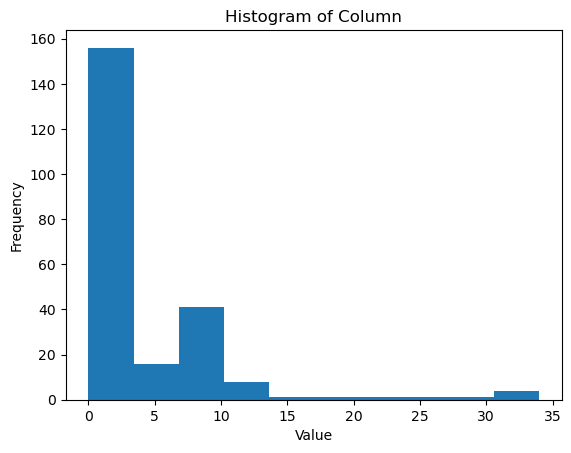

In [36]:
plt.hist(d['202306시점-최대매출시점'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.show()

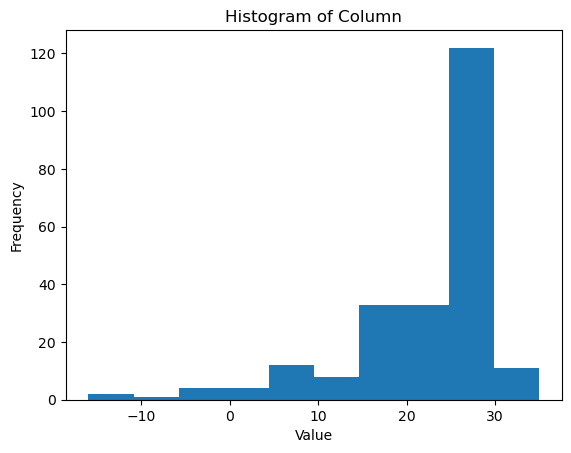

In [37]:
plt.hist(d['최대매출시점-최소매출시점'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.show()

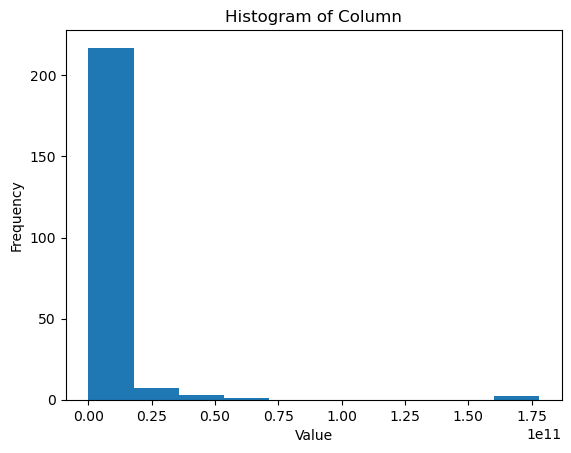

In [15]:
plt.hist(d['최대매출-최소매출'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.show()

In [63]:
d['최대매출-최소매출']= np.log(d['최대매출-최소매출'])

In [64]:
d['202306매출']= np.log(d['202306매출'])

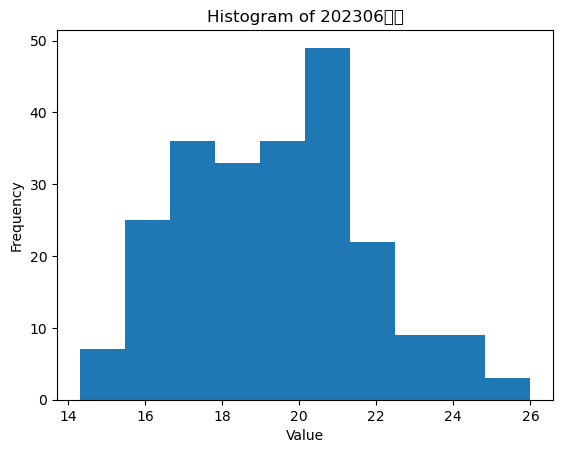

In [68]:
plt.hist(d['202306매출'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 202306매출')
plt.show()

c:\Users\ohke7\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


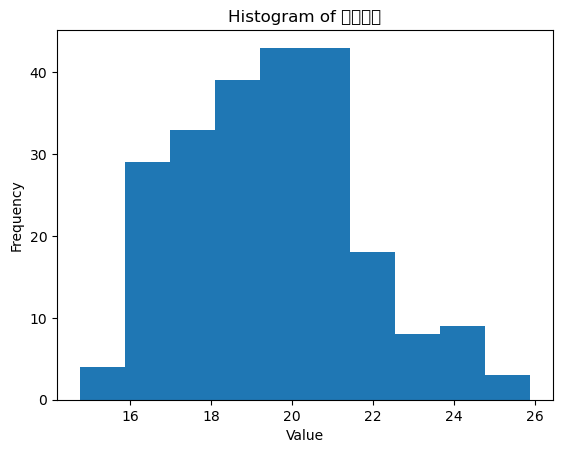

In [69]:
plt.hist(d['최대매출-최소매출'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 매출차이')
plt.show()

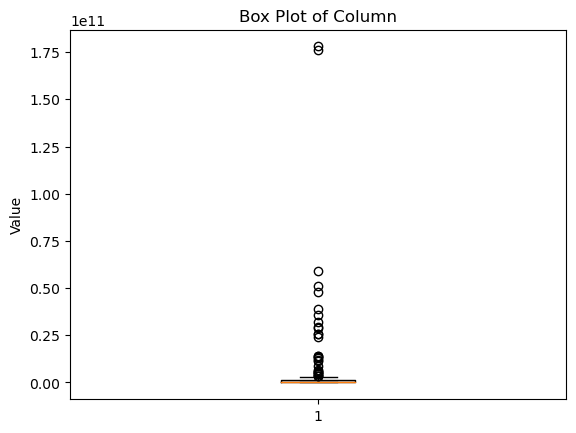

In [12]:
import matplotlib.pyplot as plt

# 데이터프레임 df의 'Column' 열의 박스 플롯 그리기
plt.boxplot(d['최대매출-최소매출'])
plt.ylabel('Value')
plt.title('Box Plot of Column')
plt.show()

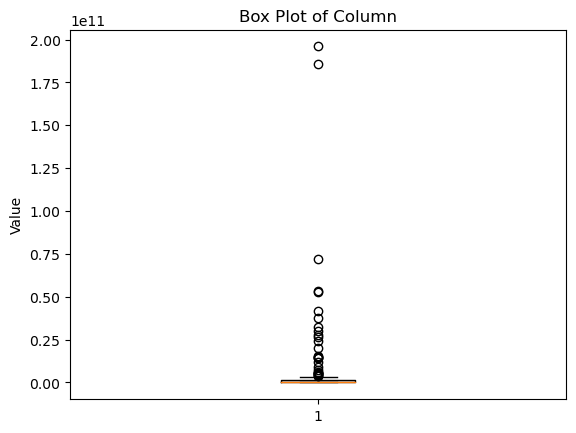

In [13]:
plt.boxplot(d['202306매출'])
plt.ylabel('Value')
plt.title('Box Plot of Column')
plt.show()

In [47]:
d

,시구,최대매출-최소매출,202306매출,최대매출시점-최소매출시점,202306시점-최대매출시점
0,강원 강릉시,1.852154e+09,1.528780e+09,19,10
1,강원 고성군,3.699204e+08,3.927572e+08,4,10
2,강원 동해시,1.369717e+08,1.431363e+08,29,0
3,강원 삼척시,9.829908e+07,1.093184e+08,29,0
4,강원 속초시,2.379470e+09,1.774429e+09,5,10
...,...,...,...,...,...
225,충북 제천시,1.325920e+08,2.283624e+07,26,2
226,충북 증평군,2.342703e+07,1.071605e+08,29,1
227,충북 진천군,9.766702e+07,1.314006e+09,27,1
228,충북 청주시,1.022648e+09,2.673434e+08,27,2


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(d.iloc[:,1:])


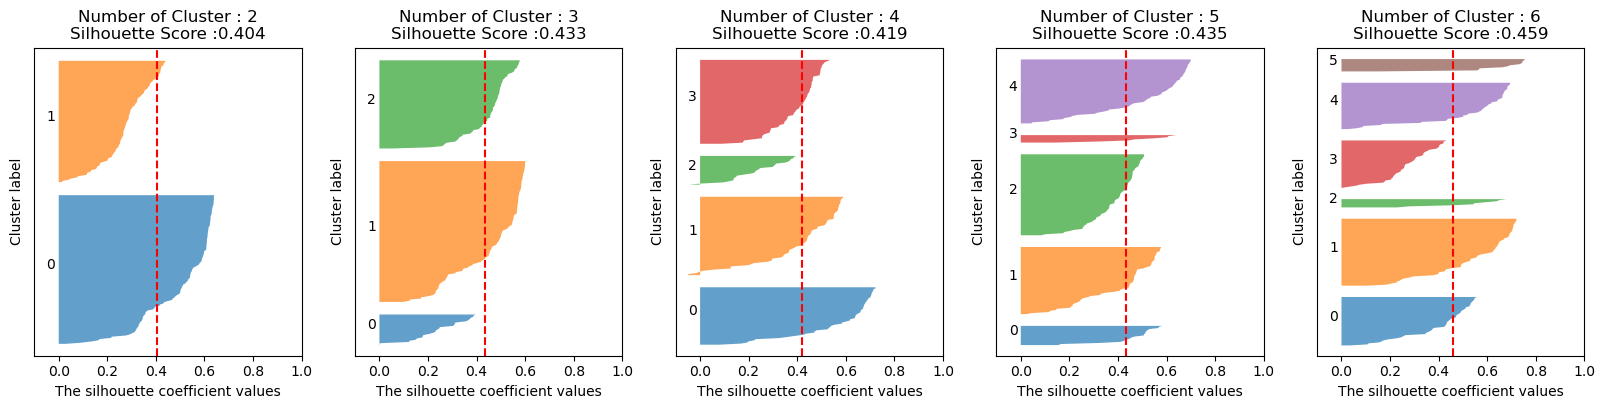

In [71]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
def visualize_silhouette(cluster_lists, X_features):



    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, init='k-means++',max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            #color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                #facecolor=color, edgecolor=color, 
                                alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([ 2, 3, 4, 5, 6], scaled_features)

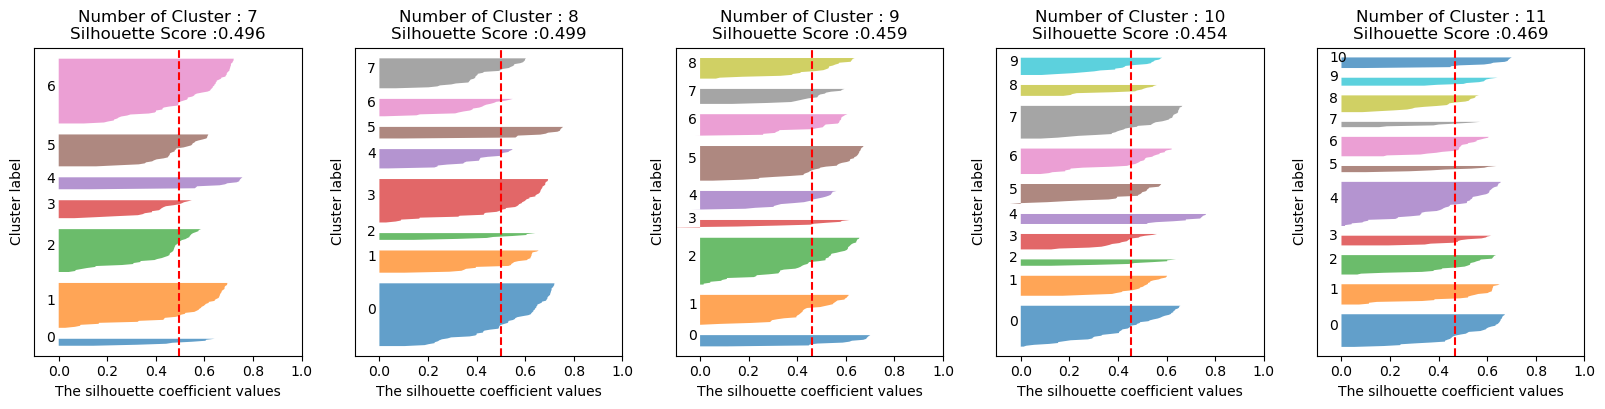

In [72]:
visualize_silhouette([ 7,8,9,10,11], scaled_features)

In [73]:
clusterer = KMeans(n_clusters = 5, init='k-means++',max_iter=500, random_state=0)

In [74]:
cluster_labels = clusterer.fit_predict(scaled_features)

In [88]:
d['cluster']=cluster_labels

In [89]:
d

,시구,최대매출-최소매출,202306매출,최대매출시점-최소매출시점,202306시점-최대매출시점,cluster
0,강원 강릉시,1.852154e+09,1.528780e+09,19,10,2
1,강원 고성군,3.699204e+08,3.927572e+08,4,10,0
2,강원 동해시,1.369717e+08,1.431363e+08,29,0,4
3,강원 삼척시,9.829908e+07,1.093184e+08,29,0,4
4,강원 속초시,2.379470e+09,1.774429e+09,5,10,0
...,...,...,...,...,...,...
224,충북 제천시,1.325920e+08,1.031203e+08,26,2,4
225,충북 증평군,2.342703e+07,2.283624e+07,29,1,4
226,충북 진천군,9.766702e+07,1.071605e+08,27,1,4
227,충북 청주시,1.022648e+09,1.314006e+09,27,2,1


In [90]:
d.to_csv("clusterdata.csv", encoding='cp949')

In [82]:
c4=d[d['cluster']==4]
c4.to_csv("군집4.csv", encoding='cp949')

In [83]:
c2=d[d['cluster']==2]
c2.to_csv("군집2.csv", encoding='cp949')

In [84]:
c1=d[d['cluster']==1]
c1.to_csv("군집1.csv", encoding='cp949')

In [85]:
c3=d[d['cluster']==3]
c3.to_csv("군집3.csv", encoding='cp949')

In [86]:
c0=d[d['cluster']==0]
c0.to_csv("군집0.csv", encoding='cp949')